In [1]:
import torch
import torchvision
import os

tile_size = 512

parent_dir = "rois2/"
img_dir = parent_dir + "images/"
tile_dir = parent_dir + "tiles/"
model_dir = parent_dir + "models/"

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
import time
class Timer:
    def __init__(self):
        self.start_time = None
        self.end_time = None

    def start(self):
        self.start_time = time.time()

    def stop(self):
        self.end_time = time.time()

    def elapsed_time(self):
        if self.start_time is None:
            raise ValueError("Timer has not been started.")
        if self.end_time is None:
            raise ValueError("Timer has not been stopped.")

        elapsed_seconds = self.end_time - self.start_time
        hours = int(elapsed_seconds // 3600)
        elapsed_seconds %= 3600
        minutes = int(elapsed_seconds // 60)
        seconds = elapsed_seconds % 60

        return str(f"Elapsed time: {hours} hours, {minutes} minutes, {seconds:.2f} seconds")

load dataset from pkl

In [4]:
from torch.utils.data import Dataset, DataLoader
import albumentations as A
import numpy as np
import re
import cv2
from dataset_operations import InputDataset, custom_collate_fn, get_transform, check_pred_boxes, calculate_iou, trainModel, read_mean_std
import pickle

mean, std = read_mean_std(img_dir)
print(mean, std)
train_dataloader = pickle.load(open(model_dir + 'train_dataloader.pkl', 'rb'))
val_dataloader = pickle.load(open(model_dir + 'val_dataloader.pkl', 'rb'))

mean:  [0.77296131, 0.71338682, 0.68258603]
std:  [0.16751114, 0.19680141, 0.21965831]
[0.77296131, 0.71338682, 0.68258603] [0.16751114, 0.19680141, 0.21965831]


In [5]:
print(len(train_dataloader), len(val_dataloader))

895 192


In [6]:
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2)
model = model.to('cuda')

In [7]:
# chkpt = 0

# # chkpt = 'rois2/models/model_epoch30.pth'

# model.load_state_dict(torch.load(chkpt))
# epoch_begin = chkpt.split('epoch')[1].split('.')[0] + 1

epoch_begin = 1
epochs_num = 20

Training started
     Epoch[1/20], train batch[100/895], bbox loss: 1.1346276303132374, current learning rate:  0.001
     Epoch[1/20], train batch[200/895], bbox loss: 0.9009466042389741, current learning rate:  0.001
     Epoch[1/20], train batch[300/895], bbox loss: 0.610004429957446, current learning rate:  0.001
     Epoch[1/20], train batch[400/895], bbox loss: 0.6333445951689122, current learning rate:  0.001
     Epoch[1/20], train batch[500/895], bbox loss: 0.8307605226716351, current learning rate:  0.001
     Epoch[1/20], train batch[600/895], bbox loss: 0.5069663819144754, current learning rate:  0.001
     Epoch[1/20], train batch[700/895], bbox loss: 0.3789211060736597, current learning rate:  0.001
     Epoch[1/20], train batch[800/895], bbox loss: 1.0214308024720942, current learning rate:  0.001
     Epoch[1/20], train batch[895/895], bbox loss: 0.35390253729642707, current learning rate:  0.001
Validation started
     Epoch[1/20],  val batch[100/192], current recall =

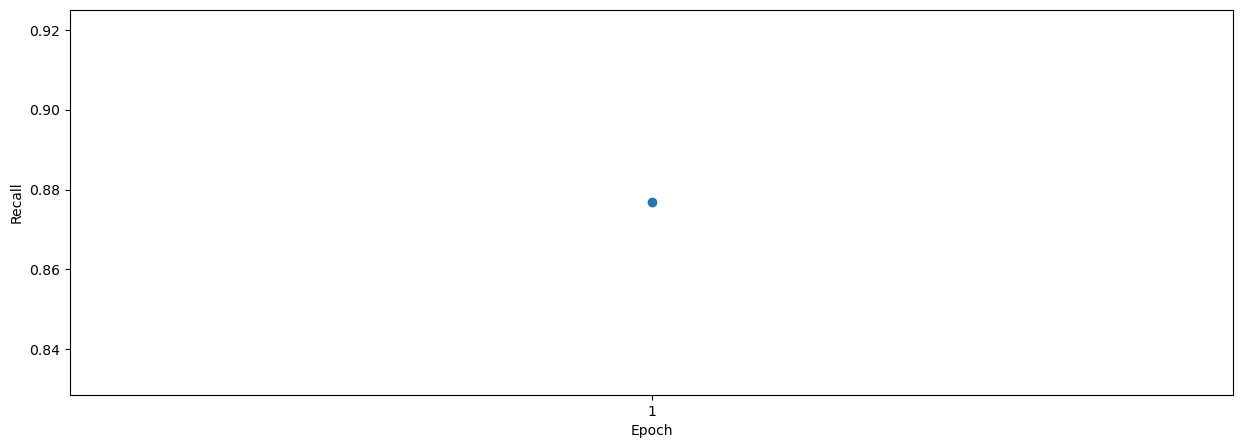

Training started
     Epoch[2/20], train batch[100/895], bbox loss: 0.5934595660287506, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[200/895], bbox loss: 0.5577618069406869, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[300/895], bbox loss: 0.5766813822090626, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[400/895], bbox loss: 0.6002012552545134, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[500/895], bbox loss: 0.6504150875671594, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[600/895], bbox loss: 0.600239702079394, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[700/895], bbox loss: 0.6877302181662864, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[800/895], bbox loss: 0.5598636068859878, current learning rate:  0.000989084726566536
     Epoch[2/20], train batch[895/895], bbox loss: 0.402

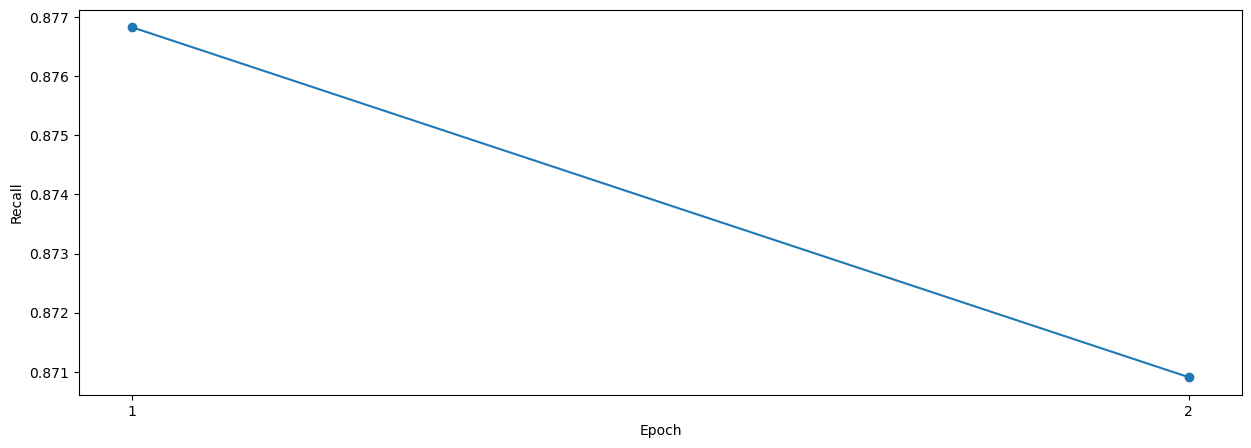

Training started
     Epoch[3/20], train batch[100/895], bbox loss: 0.28664535006546243, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[200/895], bbox loss: 0.38862649845865976, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[300/895], bbox loss: 0.4026227444410324, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[400/895], bbox loss: 0.3751361817121506, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[500/895], bbox loss: 0.27798029389774914, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[600/895], bbox loss: 0.41760710148227137, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[700/895], bbox loss: 0.31188219197846334, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[800/895], bbox loss: 0.35682982007662456, current learning rate:  0.0009568159560924792
     Epoch[3/20], train batch[895/895], b

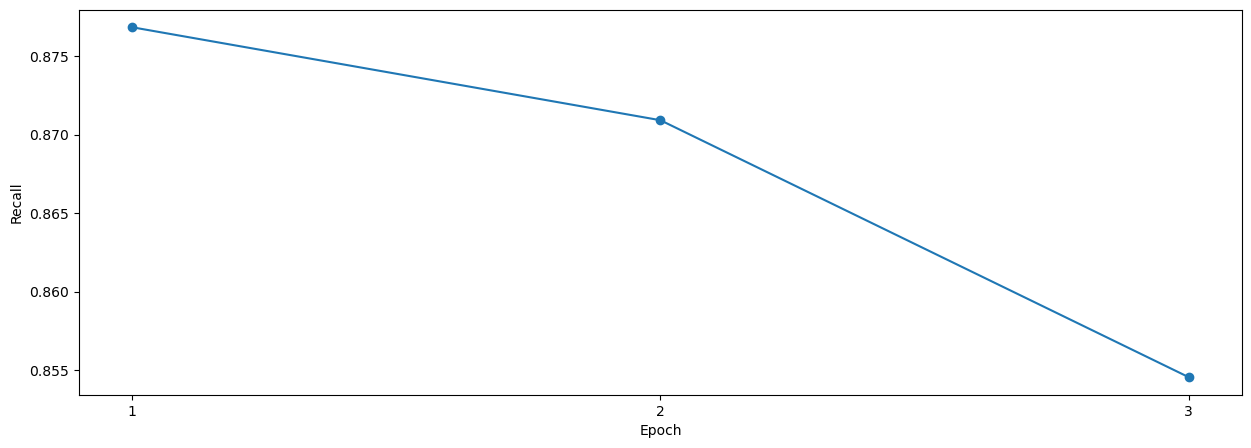

Training started
     Epoch[4/20], train batch[100/895], bbox loss: 0.2950201941686764, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[200/895], bbox loss: 0.35455251284194794, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[300/895], bbox loss: 0.4547115598669213, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[400/895], bbox loss: 0.3248720607982996, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[500/895], bbox loss: 0.2261322767928589, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[600/895], bbox loss: 0.3980617105960846, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[700/895], bbox loss: 0.2825244465406905, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[800/895], bbox loss: 0.4174269576690027, current learning rate:  0.0009046039886902865
     Epoch[4/20], train batch[895/895], bbox l

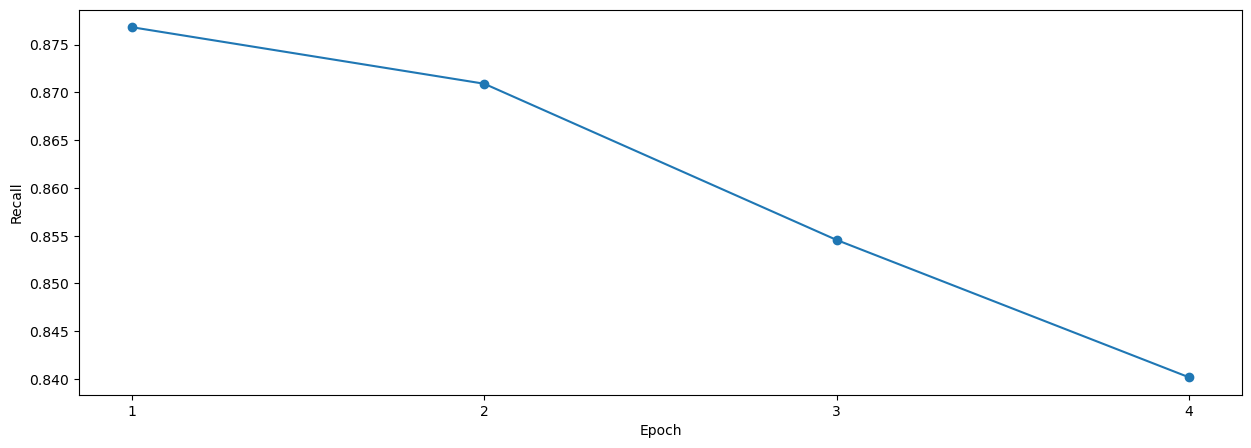

Training started
     Epoch[5/20], train batch[100/895], bbox loss: 0.14567770366556942, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[200/895], bbox loss: 0.2205002480186522, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[300/895], bbox loss: 0.30546337709415194, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[400/895], bbox loss: 0.24939548890841634, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[500/895], bbox loss: 0.29048361725666944, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[600/895], bbox loss: 0.25138999008330976, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[700/895], bbox loss: 0.3848176642280558, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[800/895], bbox loss: 0.5055703811078995, current learning rate:  0.0008347307378762499
     Epoch[5/20], train batch[895/895], bb

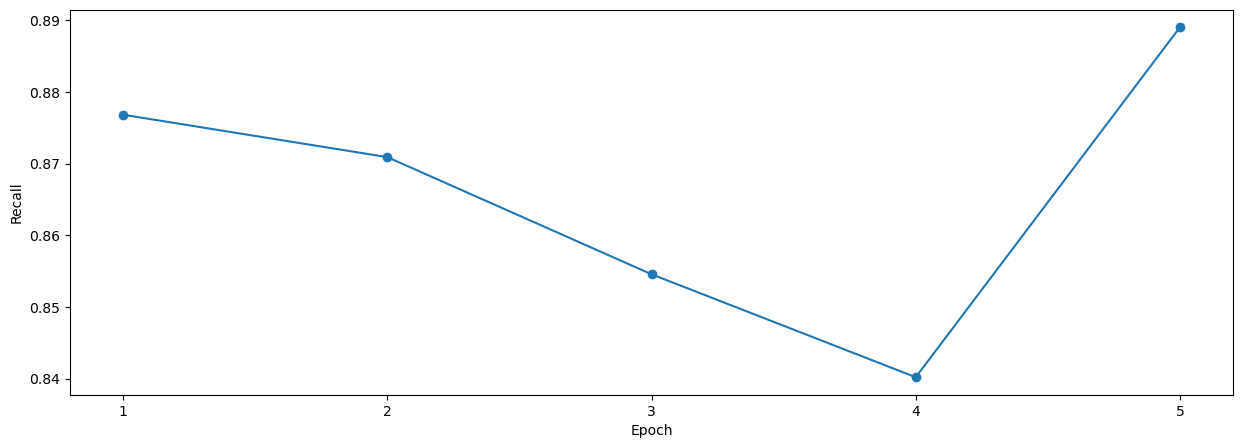

Training started
     Epoch[6/20], train batch[100/895], bbox loss: 0.23099392819769526, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[200/895], bbox loss: 0.219440099503845, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[300/895], bbox loss: 0.23315197840500412, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[400/895], bbox loss: 0.26042093813998024, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[500/895], bbox loss: 0.3349434721801016, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[600/895], bbox loss: 0.19671013648621738, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[700/895], bbox loss: 0.36612323550102505, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[800/895], bbox loss: 0.3857669504598165, current learning rate:  0.0007502500000000003
     Epoch[6/20], train batch[895/895], bbo

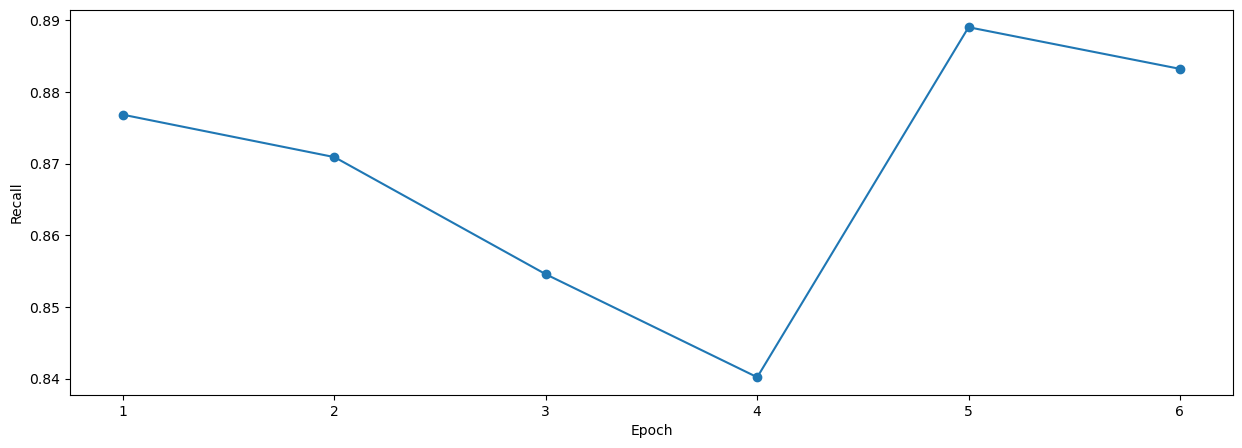

Training started
     Epoch[7/20], train batch[100/895], bbox loss: 0.24601196451929577, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[200/895], bbox loss: 0.17917451432773043, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[300/895], bbox loss: 0.2755224147328624, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[400/895], bbox loss: 0.1931855213784036, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[500/895], bbox loss: 0.3054943582152619, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[600/895], bbox loss: 0.2315001833167943, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[700/895], bbox loss: 0.25883910286275646, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[800/895], bbox loss: 0.31597127571819333, current learning rate:  0.0006548539886902865
     Epoch[7/20], train batch[895/895], bbo

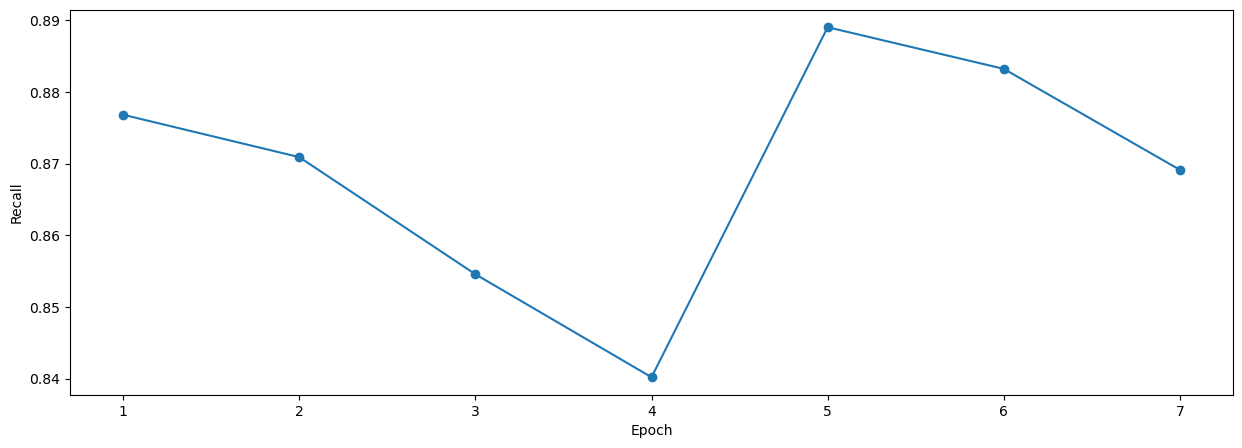

Training started
     Epoch[8/20], train batch[100/895], bbox loss: 0.11064229077763027, current learning rate:  0.0005527119674021932
     Epoch[8/20], train batch[200/895], bbox loss: 0.1336033086364086, current learning rate:  0.0005527119674021932
     Epoch[8/20], train batch[300/895], bbox loss: 0.152507084608078, current learning rate:  0.0005527119674021932
     Epoch[8/20], train batch[400/895], bbox loss: 0.1553555358693285, current learning rate:  0.0005527119674021932


KeyboardInterrupt: 

In [8]:
trainModel(model = model, 
           parent_dir=parent_dir, 
           train_dataloader=train_dataloader, 
           val_dataloader=val_dataloader, 
           epochs_num=epochs_num,
           epoch_begin=epoch_begin, 
           nms_thr=0.5, 
           iou_thr=0.5, 
           device='cuda',
           chkpt_name='round1_model',
           loss_penalty=5
           )
    
    
    
    